## UCI Machine Learning Repository data seti kullanılmıştır

In [2]:
# Veri tipi dönüşümü ve eksik verinin tamamlanması (missing data imputation).
# Sürekli nitelikleri belirli aralıklara bölmek ve kategorik veriye dönüştürmek amacıyla gerçekleştirilen veri ayrıklaştırma (data discretization).
# Veri seti özetleme ve niteliklerin belirli kriterlere göre gruplandırılması.
#  Veri setindeki tekrar eden gözlemlerin (duplicates) tespit edilmesi.
#  Aykırı değerlerin tespit edilmesi (outlier detection).
#   Rastgele örnekleme (random sampling) ve tabakalı örnekleme (stratified sampling).
#      Kategorik nitelikleri sayısal formata dönüştürmede kullanılan yapay kodlama (dummy coding).
#      farklı ölçeklerdeki nitelikleri aynı ölçeğe getirmeyi sağlayan veri normalizasyonu (data normalization).

##  Python ile Temel Veri Ön-işleme Teknikleri

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.cbook import boxplot_stats
import random
from random import sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler,StandardScaler





In [4]:
nitelikAdlari=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"]
verSeti=pd.read_csv("./auto-mpg.data", sep="\s+",header=None, names=nitelikAdlari, index_col="car_name",decimal=".")
verSeti

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\gokha\AppData\Local\Temp\ipykernel_2996\3509779380.py:2: SyntaxWarning: invalid escape sequence '\s'
  verSeti=pd.read_csv("./auto-mpg.data", sep="\s+",header=None, names=nitelikAdlari, index_col="car_name",decimal=".")


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.00,2790.0,15.6,82,1
vw pickup,44.0,4,97.0,52.00,2130.0,24.6,82,2
dodge rampage,32.0,4,135.0,84.00,2295.0,11.6,82,1


In [5]:
verSeti.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object

## Veri Tipi Dönüşümü ve Eksik Verinin Tamamlanması

In [6]:
verSeti.loc[verSeti.horsepower == "?","horsepower"] =np.nan
verSeti.horsepower =verSeti.horsepower.astype("float64")

In [7]:
print(verSeti.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [8]:
verSeti["horsepower"].fillna(verSeti["horsepower"].mean().round(0),inplace=True)
print(verSeti.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


C:\Users\gokha\AppData\Local\Temp\ipykernel_2996\1700195849.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  verSeti["horsepower"].fillna(verSeti["horsepower"].mean().round(0),inplace=True)


In [9]:
#ikinci yol
verSeti.loc[verSeti.horsepower.isnull(),"horsepower"] = verSeti.loc[~(verSeti.horsepower.isnull()),"horsepower"].mean().round(0)

In [10]:
verSeti["durum"] = verSeti.mpg.map(lambda x : "Düşük" if x < 23.5 else "Orta" if((x >= 23.5) & (x<30)) else "Yüksek" ).astype("category")
verSeti.durum.value_counts()

durum
Düşük     208
Orta       98
Yüksek     92
Name: count, dtype: int64

In [11]:
bolmeKartegorileri=["Düşük","Orta","Yüksek"]
bolmeler=[8,23.4,29.9,46.6]

verSeti["durum"]= pd.cut(verSeti["mpg"], bins=bolmeler,labels=bolmeKartegorileri)
durum_ef=pd.qcut(verSeti["mpg"], q=3)
durum_ef.value_counts()

mpg
(8.999, 19.0]     143
(26.933, 46.6]    133
(19.0, 26.933]    122
Name: count, dtype: int64

##  Veri Seti Özeti ve Veri Gruplandırma

- kaç adet örnek olduğu (count), 
- ortalama (mean), 
- standart sapma (std), 
- minimum değer (min), 
- kartil (25%), 
- kartil/ortanca değer (50% ya da median), 
- kartil (75%) ve 
- maksimum değer (max)

Kategorik nitelikler için ise; 
- kaç adet örnek içerdiği (count), 
- kaç kategoriye sahip olduğu (unique),
- en yüksek frekansa sahip olan kategorinin adı (top),
- veri setinde o kategoriye sahip kaç örnek olduğu (freq) 

In [12]:
pd.set_option("display.max_columns",20)
verSeti.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,durum
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Düşük
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN


- A değişkeni DataFrame iken B değişkeni Series nesnesidir

In [13]:

A=verSeti[["mpg","durum"]].groupby("durum").mean()
B=verSeti.groupby("durum")["mpg"].mean()

C=verSeti[["mpg","durum"]].groupby("durum").sum()
D=verSeti[["mpg","durum"]].groupby("durum").count()
E=verSeti[["mpg","durum"]].groupby("durum").min()
F=verSeti[["mpg","durum"]].groupby("durum").max()
G=verSeti[["mpg","durum"]].groupby("durum").std()
H=verSeti[["mpg","durum"]].groupby("durum").describe()


print(A)
print(B)
print(C)
print(D)
print(E)
print(F)
print(G)
print(H)


              mpg
durum            
Düşük   17.263942
Orta    26.343878
Yüksek  34.632609
durum
Düşük     17.263942
Orta      26.343878
Yüksek    34.632609
Name: mpg, dtype: float64
           mpg
durum         
Düşük   3590.9
Orta    2581.7
Yüksek  3186.2
        mpg
durum      
Düşük   208
Orta     98
Yüksek   92
         mpg
durum       
Düşük    9.0
Orta    23.5
Yüksek  30.0
         mpg
durum       
Düşük   23.2
Orta    29.9
Yüksek  46.6
             mpg
durum           
Düşük   3.353821
Orta    1.783606
Yüksek  3.826343
          mpg                                                       
        count       mean       std   min     25%    50%    75%   max
durum                                                               
Düşük   208.0  17.263942  3.353821   9.0  14.375  17.55  20.00  23.2
Orta     98.0  26.343878  1.783606  23.5  25.000  26.00  28.00  29.9
Yüksek   92.0  34.632609  3.826343  30.0  31.875  33.90  36.55  46.6


C:\Users\gokha\AppData\Local\Temp\ipykernel_2996\2966597711.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  A=verSeti[["mpg","durum"]].groupby("durum").mean()
C:\Users\gokha\AppData\Local\Temp\ipykernel_2996\2966597711.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  B=verSeti.groupby("durum")["mpg"].mean()
C:\Users\gokha\AppData\Local\Temp\ipykernel_2996\2966597711.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

 Tekrar Eden Gözlemlerin Bulunması

duplicated() fonksiyonu kullanılabilir. keep="first" parametresi, tekrar edilen gözlem değeri hariç bu gözlemden sonra tekrar eden diğer gözlemleri True olarak işaretler, diğer gözlemleri False olarak işaretler


In [18]:
tekrarlar_f=verSeti.duplicated(keep='first')
tekrarlar_l=verSeti.duplicated(keep='last')

print(tekrarlar_f)
print("-----------------------------------------------------------------------------------------------------------")
print(tekrarlar_l)

car_name
chevrolet chevelle malibu    False
buick skylark 320            False
plymouth satellite           False
amc rebel sst                False
ford torino                  False
                             ...  
ford mustang gl              False
vw pickup                    False
dodge rampage                False
ford ranger                  False
chevy s-10                   False
Length: 398, dtype: bool
-----------------------------------------------------------------------------------------------------------
car_name
chevrolet chevelle malibu    False
buick skylark 320            False
plymouth satellite           False
amc rebel sst                False
ford torino                  False
                             ...  
ford mustang gl              False
vw pickup                    False
dodge rampage                False
ford ranger                  False
chevy s-10                   False
Length: 398, dtype: bool


In [20]:
indislerim = tekrarlar_l | tekrarlar_f
verSeti[indislerim]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,durum
car_name,,,,,,,,,


 Kullanılan veri setinde herhangi bir tekrar eden gözlem değeri olmadığından sonuçta hiçbir şey yazdırılmamıştır 

Tekrar gözlemler çıkar

In [21]:
verSeti2=verSeti.drop_duplicates()

~ Aykırı Değerlerin Tespiti

(Inter Quartile Range - IQR)

In [38]:
q1=verSeti["horsepower"].quantile(0.25)
q3= verSeti["horsepower"].quantile(0.75)

IQR= q3 - q1
alt = q1 - 1.5*IQR
ust = q3 + 1.5*IQR

ust_aykiriDegerInd= np.where(verSeti["horsepower"] >=ust)[0]
alt_aykiriDegerInd= np.where(verSeti["horsepower"] <=alt)[0]

ust_aykiriDegerInd






array([  6,   7,   8,  13,  25,  26,  27,  67,  94,  95, 116], dtype=int64)

In [30]:
alt_aykiriDegerInd

array([], dtype=int64)

C:\Users\gokha\AppData\Local\Temp\ipykernel_2996\2746295048.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="horsepower",data=verSeti,palette="magma")


<Axes: ylabel='horsepower'>

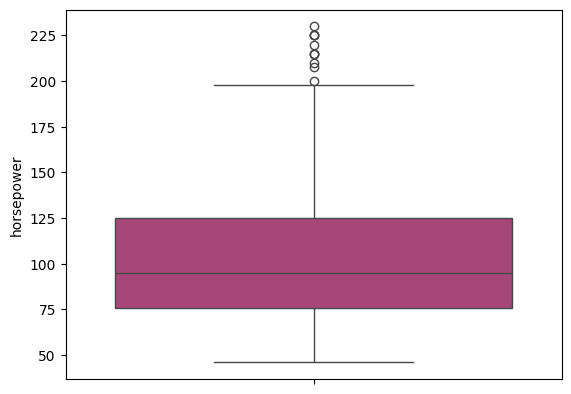

In [33]:
sns.boxplot(y="horsepower",data=verSeti,palette="magma")

Eğer aykırı değerler veri setinden kaldırılmak istenirse aşağıdaki Python kodları çalıştırılabilir.

verSeti.drop(index=ust_aykiriDegerInd, inplace=True)
